In [1]:

# from scipy.optimize import minimize
import numpy as np
import sys
# from math import factorial
import scipy 
import scipy.special as ssp
from scipy.optimize import minimize
from scipy import integrate
import scipy.stats as st

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib as mpl

from IPython.display import display, Math

In [2]:
import numpy as np

In [3]:
from numpy import exp, log, log10

In [4]:
# lambda_max, lambda_min = 
t_emerge, t_min, t_required = 0.7, 0.5, 3.5


In [86]:
def pdf(lambdaa, distribution):
    lambda_max, lambda_min = max(lambdaa), min(lambdaa)
    term_1 = 1-np.exp(-lambdaa*(t_emerge - t_min))
    term_2 = 1-np.exp(-lambdaa*(t_required - t_min))
    p_d_m = term_1/term_2
    
#     if distribution == "uniform":
#         return p_d_m / sum(p_d_m)
#     elif distribution == "jeffery":
#         return (p_d_m / lambdaa) / sum(p_d_m / lambdaa)
#     elif distribution == 'log':
#         return 

    if distribution == "uniform":
        prior = lambdaa / (lambda_max - lambda_min)
    elif distribution == "log":
        prior = lambdaa /(lambdaa * log(lambda_max / lambda_min))
    elif distribution == 'inv':
        prior = 1 / lambdaa * 1 / (1/lambda_min - 1/lambda_max)
    pdf = p_d_m * prior/ sum( p_d_m * prior )
    return pdf, prior

In [87]:
lambdaa = np.logspace (start = -3, stop= 3, num=10)

In [88]:
y_uni, prior_uni = pdf(lambdaa, "uniform")
y_log, prior_log = pdf(lambdaa, "log")
y_inv, prior_inv = pdf(lambdaa, "inv")

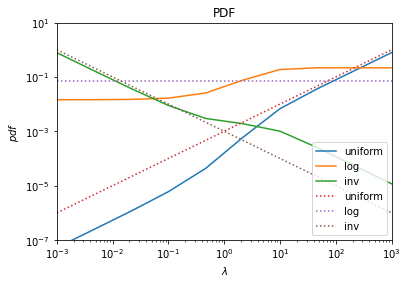

In [96]:
# plt.errorbar(z,m, yerr= m_err,fmt='k.', ecolor="black", mec='red', label ="Measured values")
plt.plot(lambdaa, y_uni, label = "uniform")
plt.plot(lambdaa, y_log, label = "log")
plt.plot(lambdaa, y_inv, label = "inv")
plt.plot(lambdaa, prior_uni,':', label = "uniform")
plt.plot(lambdaa, prior_log, ':', label = "log")
plt.plot(lambdaa, prior_inv, ':', label = "inv")
# r"$\Omega_M=${0:.2f}, $\Omega_\Lambda=${1:.2f}, $H_0=${2:.2f}, $M=$ {3:.2f}".
#          format(omegaMa,omegaLa,H0a,Ma)) 
plt.ylim([1e-7,1e+0])
plt.xlabel(r"$\lambda$")
plt.xscale("log")
plt.ylim(1e-7, 1e1)
plt.xlim(1e-3, 1e3)
plt.yscale("log")
plt.ylabel(r"$pdf$")
plt.legend(loc="lower right")
plt.title("PDF")
plt.show()

# Navya Suggestion

In [31]:
lambdaa1= np.linspace (start = 1e-3, stop= 1e+3, num=10)

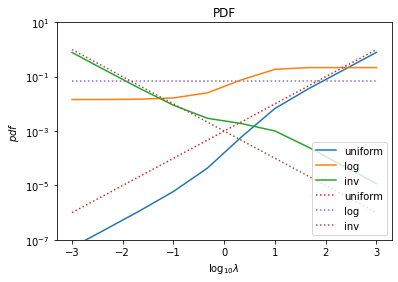

In [95]:
plt.plot(np.log10(lambdaa), y_uni, label = "uniform")
plt.plot(np.log10(lambdaa), y_log, label = "log")
plt.plot(np.log10(lambdaa), y_inv, label = "inv")
plt.plot(np.log10(lambdaa), prior_uni,':', label = "uniform")
plt.plot(np.log10(lambdaa), prior_log, ':', label = "log")
plt.plot(np.log10(lambdaa), prior_inv, ':', label = "inv")
# r"$\Omega_M=${0:.2f}, $\Omega_\Lambda=${1:.2f}, $H_0=${2:.2f}, $M=$ {3:.2f}".
#          format(omegaMa,omegaLa,H0a,Ma)) 
plt.ylim([1e-7,1e+0])
plt.xlabel(r"log$_{10}\lambda$")
# plt.xscale("log")
plt.ylim(1e-7, 1e1)
# plt.xlim(1e-3, 1e3)
plt.yscale("log")
plt.ylabel(r"$pdf$")
plt.legend(loc="lower right")
plt.title("PDF")
plt.show()

# CDF

In [11]:
def cdf(lambdaa, pdf, normalize=False):
    cdf = []
    for i in range(len(lambdaa)):
        cdf_value = np.trapz(pdf[:(i+1)], lambdaa[:(i+1)] )
        cdf.append(cdf_value)
    if normalize is True:
        norm = np.trapz(pdf, lambdaa)
        cdf = cdf/norm
    return cdf

In [78]:
cdf

[0.0,
 0.021407605097791913,
 0.042995619915345104,
 0.0654416228340749,
 0.09227834197103173,
 0.14328230530411581,
 0.28480239307453403,
 0.5694996192079016,
 0.8898502431865344,
 1.2102253742242086]

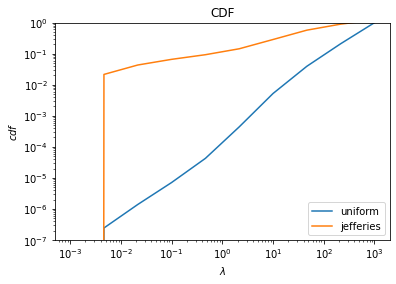

In [79]:
# plt.errorbar(z,m, yerr= m_err,fmt='k.', ecolor="black", mec='red', label ="Measured values")
plt.plot(lambdaa,cdf(lambdaa,y_uni),label = "uniform")
plt.plot(lambdaa, cdf(lambdaa,y_log), label = "jefferies")
# r"$\Omega_M=${0:.2f}, $\Omega_\Lambda=${1:.2f}, $H_0=${2:.2f}, $M=$ {3:.2f}".
#          format(omegaMa,omegaLa,H0a,Ma)) 
plt.ylim([1e-7,1e+0])
plt.xlabel(r"$\lambda$")
plt.xscale("log")
plt.yscale("log")
plt.ylabel(r"$cdf$")
plt.legend(loc="lower right")
plt.title("CDF")
plt.show()